# Trajectory generation

In [35]:
import numpy as np

def generate_trajectory(start, end, T=0.2):

    x0, y0, z0, h0 = start
    x1, y1, z1, h1 = end
    
    # Calculate the number of samples
    distance = np.sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)
    num_samples = int(np.ceil(distance / T)) + 1
    
    # Generate linearly spaced points between start and end
    x = np.linspace(x0, x1, num_samples)
    y = np.linspace(y0, y1, num_samples)
    z = np.linspace(z0, z1, num_samples)
    heading = np.linspace(h0, h1, num_samples)
    
    # Format the trajectory as a list of tuples
    trajectory = [(xi, yi, zi, hi) for xi, yi, zi, hi in zip(x, y, z, heading)]
    
    return trajectory

def save_trajectory(trajectory, filename):
    with open(filename, 'w') as file:
        for point in trajectory:
            line = ','.join(map(str, point)) + '\n'
            file.write(line)

start_point = (-40, -40, 3, 0.0)
end_point = (-32, -32, 3, 0.0)
trajectory = generate_trajectory(start_point, end_point, T=0.2)
filename = 'trajectory.txt'
save_trajectory(trajectory, filename)

print(f"Trajectory saved to {filename}.")

Trajectory saved to trajectory.txt.


In [2]:
import numpy as np


def generate_trajectory(waypoints, hover_times, T=0.2):
    trajectory = []
    for i in range(len(waypoints) - 1):
        x0, y0, z0, h0 = waypoints[i]
        x1, y1, z1, h1 = waypoints[i+1]
        hover_time = hover_times[i]
        
        # Calculate number of samples for the hover period
        num_hover_samples = int(hover_time / T)
        trajectory.extend([(x0, y0, z0, h0)] * num_hover_samples)
        
        # Interpolate to next waypoint
        distance = np.sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)
        num_travel_samples = int(np.ceil(distance / T))
        if num_travel_samples > 0:
            x = np.linspace(x0, x1, num_travel_samples + 1)
            y = np.linspace(y0, y1, num_travel_samples + 1)
            z = np.linspace(z0, z1, num_travel_samples + 1)
            heading = np.linspace(h0, h1, num_travel_samples + 1)
            trajectory.extend([(xi, yi, zi, hi) for xi, yi, zi, hi in zip(x[1:], y[1:], z[1:], heading[1:])])
    
    # Add hover time at the last waypoint
    x_last, y_last, z_last, h_last = waypoints[-1]
    num_final_hover_samples = int(hover_times[-1] / T)
    trajectory.extend([(x_last, y_last, z_last, h_last)] * num_final_hover_samples)
    
    return trajectory

In [6]:
#RX  -1.27409
#TX -0.7853982

#waypoints = [(0, 0, 3, -0.7853982), (3,0,3, -0.7853982)]
waypoints = [(-55, 15, 3, 0.3), (-55, 20, 3, 0.3),(-55,25,3,0.3),(-55,30,3,0.3),(-55,35,3,0.3),(-55,40,3,0.3)]
hover_times = [30,30,30,30,30,30] 
trajectory = generate_trajectory(waypoints, hover_times, T=0.2)

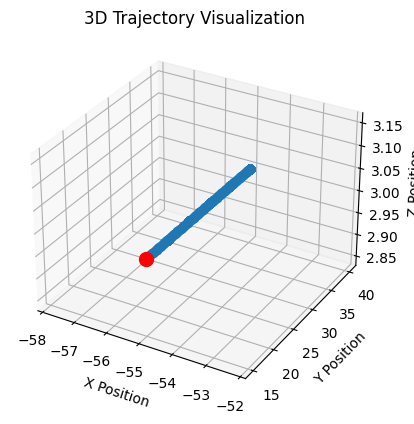

In [7]:



import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_trajectory(trajectory):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y, z, _ = zip(*trajectory)  # Ignore headings for plotting

    ax.scatter(x[0], y[0], z[0], color='red', s=100)  

    ax.plot(x, y, z, marker='o', linestyle='-')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    plt.title('3D Trajectory Visualization')
    plt.show()

plot_trajectory(trajectory)

In [5]:
import os
file_location = os.path.expanduser('~/workspace/src/uvdar_core/config/trajectory/trajectory_files/trajectory_tx_h0.3.txt')

def save_trajectory(trajectory, filename):
    with open(filename, 'w') as file:
        for point in trajectory:
            line = ','.join(map(str, point)) + '\n'
            file.write(line)

save_trajectory(trajectory, file_location)

print(f"Trajectory saved to {file_location}.")

Trajectory saved to /home/rivermar/workspace/src/uvdar_core/config/trajectory/trajectory_files/trajectory_point_lio.txt.
